In [1]:
import qutip as qt   #import qutipa czyli biblioteki do kwantówki
import numpy as np   #import numpy czyli biblioteki do macierzy i wektorów itd.
import matplotlib.pyplot as plt  #import biblioteki do rysowania wykresów
from mpl_toolkits.mplot3d import Axes3D   #Rysowanie wykresów 3d
from matplotlib import animation  #importowanie biblioteki animacji

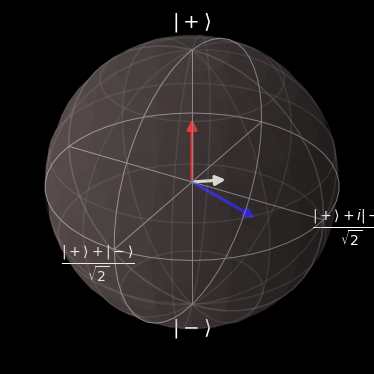

<Figure size 360x360 with 0 Axes>

In [8]:
#macierze pauliego
sx = qt.sigmax() #sigma_x
sy = qt.sigmay() #sigma_y
sz = qt.sigmaz() #sigma_z


#stany bazowe
plus = qt.basis(2,0)  #Stan |+>
minus = qt.basis(2,1)  #Stan |->


#stan poczatkowy cos(th/2)*|+> + sin(th/2)*e^{i phi}|->
th0 = np.pi/3  #kąt od bieguna północnego
phi0 = np.pi/4      #kąt od osi x (w płaszcyźnie równika)
stan0 = np.cos(th0/2)*plus + np.sin(th0/2)*np.exp(1j*phi0)*minus  #stan początkowy

#Ewolucja
bx = 0.7; by = 1; bz = 0.3        #Definiujemy wokół której osi ma się kręcić (bx,by,bz)
H = (bx*sx+by*sy+bz*sz).unit()   #Hamiltonian znormalizowany tzn. częstość kołowa omega = 1
tlist = np.linspace(0,6*np.pi,41)#Lista czasów (dająca obrót o pi)
res = qt.mesolve(H,stan0,tlist)  #obliczamy ewolucję
states = res.states              #Lista stanów w kolejnych chwilach czasu

ez = []                           #inicjalizacja listy rzutów na oś z
for state in states:
    ez.append(qt.expect(sz,state)) #rzut na oś z w każdej chwili czasu ez[i]
    #ez[i] = p_+[i] -  p_-[i] =>  2 p_+[i] - 1
    #więc p_+ = (ez+1)/2


#Rysujemy
fig = plt.figure(facecolor="black", figsize=(5,5))  #Okienko o proporcjach 5x5 o nazwie fig
ax = Axes3D(fig)           #Osie które wrzucamy do okienka fig
bloch = qt.Bloch(axes=ax)  #initializacja sfery blocha
plt.rcParams['axes.facecolor']='black'  #Upewniamy się że tło osi jest czarne

def init():    #Co powinny być na wyr
    bloch.zlabel = [r"$|+\rangle$",r"$|-\rangle$"] #zmieniamy oznaczenia osi z na |+>, |->
    bloch.xlabel = [r"$\frac{|+\rangle+|-\rangle}{\sqrt{2}}$",""] #osi x na (|+> + |->)/sqrt(2)
    bloch.ylabel = [r"$\frac{|+\rangle+i|-\rangle}{\sqrt{2}}$",""] #osi y na (|+> + i|->)/sqrt(2)
    bloch.vector_color = ['g']+["b"]+["r"]+["w"]*200  #pierwszy wektor zielonym (stan początkowy), 
                                            #drugi niebieskim(Hamiltonian), trzeci czerwony (rzut na z) 
                                            # kolejne 200 białym
    bloch.font_color="w"   #kolor czcionki to biały
    return ax  #trzeba zwrócić oś
        
def animate(i): #rysowanie w itej klatce
    bloch.clear()                #czyszczę sferę
    bloch.add_states(stan0)      #stan początkwy
    bloch.add_states(H)          #Hamiltonian
    bloch.add_states(ez[i]*sz/2) #rzut na oś z (dzielnie przez 2 to konwencja)
    bloch.add_states(states[i])  #dodaje aktualny stan
    bloch.make_sphere()          #uaktualniam
    return ax #trzeba zwrócić oś
    
#Funkcja animująca (figura,rysunek w itej klatce, opisy osi, liczba klate, nie powtarzaj)
anim = animation.FuncAnimation(fig,animate,init_func = init,frames = len(states),repeat = False ) 

anim.save("anim.gif",fps=10)  #zapisuje do pliku





Text(0.5, 0, 'time')

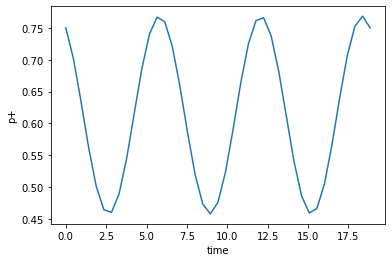

In [16]:
#Wykres prawdopodobieńśtwa zmierzenia |+> w funkcji czasu.
plt.plot(tlist, (np.array(ez) +1)/2 )
plt.ylabel("p+")
plt.xlabel("time")

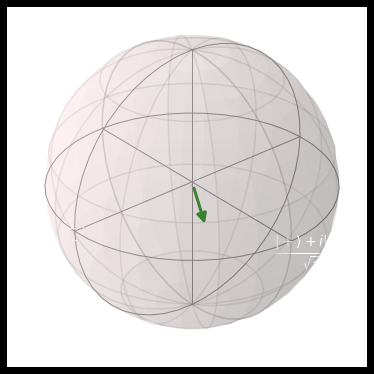

<Figure size 360x360 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, animation

fig = plt.figure(figsize=(5,5),facecolor='black')
ax = Axes3D(fig, azim=-40, elev=30)
bloch = qt.Bloch(axes=ax)

states = res.states
    
def init():
    bloch.zlabel = [r"$|+\rangle$",r"$|-\rangle$"] #zmieniamy oznaczenia osi z na |+>, |->
    bloch.xlabel = [r"$\frac{|+\rangle+|-\rangle}{\sqrt{2}}$",""] #osi x na (|+> + |->)/sqrt(2)
    bloch.ylabel = [r"$\frac{|+\rangle+i|-\rangle}{\sqrt{2}}$",""] #osi y na (|+> + i|->)/sqrt(2)
    bloch.vector_color = ['g']+["w"]+["w"]*200  #pierwszy wektor zielonym (stan początkowy), 
                                            #drugi niebieskim(Hamiltonian) kolejne 200 czarnym
    bloch.font_color="w"
    return ax

def animate(i):
    bloch.clear()
    bloch.add_states(H)
    bloch.add_states(states[i])
    bloch.make_sphere()
    return ax
    
anim = animation.FuncAnimation(fig, animate, init_func= init, frames = len(states)-1,repeat=False)
anim.save('mymovie2.gif',fps=20)

TypeError: operand 'Qobj' does not support ufuncs (__array_ufunc__=None)

In [22]:
states

[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.70710678]
  [0.70710678]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.70492702-0.05547884j]
  [0.70492702+0.05547884j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.69840116-0.11061563j]
  [0.69840116+0.11061563j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.68756945-0.16507044j]
  [0.68756945+0.16507044j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.67249866-0.21850755j]
  [0.67249866+0.21850755j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.65328172-0.27059748j]
  [0.65328172+0.27059748j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.63003709-0.32101911j]
  [0.63003709+0.32101911j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.60290809-0.36946155